## Problème de Monty Hall : 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Selimmmm/hetic_m1_csb_public/blob/master/tp_8_wrap_up_exercice.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Selimmmm/hetic_m1_csb_public/blob/master/tp_8_wrap_up_exercice.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Selimmmm/hetic_m1_csb_public/blob/master/tp_8_wrap_up_exercice.ipynb)



<img src="images/montyhall.png" alt="drawing" width="800"/>


**Problème de Monty Hall**

- Ce problème probabiliste a été popularisé par un jeu présenté par Monty Hall, d'où son nom. Il est possible de le résoudre analytiquement  (par le calcu, par exemple en appliquant la formule de Bayes)
- On peut simuler de nombreuses parties en appliquant différentes stratégies pour trouver la stratégie optimale.


**Enoncé** 


- Il y a 3 portes. Derrière l'une d'elle se cache une voiture, derrière les deux autres se cachent des chèvres.
    - Le présentateur vous demande une première fois sur quelle porte vous souhaitez parier.
    - Vous lui répondez
    - Ensuite, il élimine une des deux portes que vous n'avez pas choisi (toujours une derrière laquelle une chèvre se trouve).
    - Enfin, il vous propose de changer votre choix pour l'autre porte restante ou de rester sur votre première décision.
    
    
    
**Comment répondre au problème** 

- Les questions suivantes sont "assez" équivalentes
    - Quelle est la stratégie optimale ?
    - Quelle est la probabilité de gagner si on change systématiquement de porte ? Si on ne change jamais de porte ?
    - Pour maximiser la probabilité de gagner, faut-il garder la même porte ou changer de porte ? 

**Implémentation**

- Coder un programme qui permet : 
    - 1. A un utilisateur de jouer à ce jeu 
    - 2. A une IA qui choisit une porte au hasard et ne change jamais son choix de jouer à ce jeu
    - 3. A une IA qui choisit une porte au hasard et change toujours son choix pour la porte non éliminée par le présentateur de jouer à ce jeu
    - 4. (facultative) A une IA qui change de porte avec une propabilité p choisit par l'utilisateur de jouer à ce jeu
- Ensuite, coder un programme qui permet :
    - 5. De simuler 1000 partie avec l'une des IA codées précédemment
    - 6. De calculer le pourcentage de parties gagnées par chaque IA

        


**Conseils**

- On peut soit faire une implémentation avec des fonctions, soit avec des classes. En revanche, il ne faut pas écrire juste des scripts qui ne seront pas faciles à ré-executer dans un autre contexte, parce que le but va être de réutiliser son code plusieurs fois (par exemple pour simuler les 1000 parties).

- On peut par exemple écrire une classe qui aurait pour argument d'initialisation un ``user``, un nombre de parties à jour ``n_games`` et décomposer en une méthode pour jouer une partie ``run_one_game`` et une méthode qui lance plusieurs parties ``run_many_games`` . Il est conseillé d'écrire de plus petites méthodes que l'on appelle dans ces méthodes pour que le code soit plus lisible et limiter les niveaux d'indentation.
        
        
- Il est tout à fait possible d'utiliser des fonctions et pas des classes, par exemple en utilisant une fonction qui renvoie un nombre, 0 en cas de défaite et un en cas de victoire. On pourrait par exemple avoir une fonction par type d'utilisateur


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Selimmmm/hetic_m1_csb_public/blob/master/tp_8_wrap_up_exercice.ipynb)


In [113]:
import random
import numpy as np


class JeuMonthy: 
    def __init__(self, user, verbose=False, p=None):
        self.choix = ("1", "2", "3")
        self.score = 0 
        self.user = user
        self.verbose = verbose
        self.p = p
        
    def preparer_jeu(self): 
        """Prépare le jeu en choisissant une bonne porte"""
        self.bonne_porte = random.choice(self.choix)

        
    def input_premier_choix_utilisateur(self):  
        """Demande à l'utilisateur son premier choix - en vérifiant qu'il est correct.
           Un input est correct s'il est dans la liste de choix (1, 2, 3)"""
        
        print("Veuillez saisir une des trois portes 1, 2, 3")
        self.premier_choix = input()
            
        while self.premier_choix not in self.choix:
            print("Veuillez saisir une des trois portes 1, 2, 3")
            self.premier_choix = input()
            
    def input_premier_choix_ia(self):
        self.premier_choix = random.choice(self.choix)
        
            
            
    def exclure_porte(self):
        """Permet d'exclure une bonne derrière laquelle est une chèvre et non choisie par l'utilisateur"""
        
        self.mauvaises_portes = [porte for porte in self.choix if porte != self.bonne_porte]
        
        # Si la porte choisit est la bonne, on en exclut une au hasard
        if self.bonne_porte == self.premier_choix:
            self.porte_exclue = random.choice(self.mauvaises_portes)
            
        # Sinon, on choisit la porte qui n'est ni la bonne, ni celle choisie par l'utilisateur
        else:
            self.porte_exclue = [porte for porte in self.mauvaises_portes if porte != self.premier_choix][0]
            
        
    def input_second_choix_utilisateur(self):
        
        self.deuxieme_choix_possibles = [porte for porte in self.choix if porte != self.porte_exclue]
        print(f"Veuillez saisir une des portes {', '.join(self.deuxieme_choix_possibles)}")
        self.deuxieme_choix = input()
            
        while self.deuxieme_choix not in self.deuxieme_choix_possibles:
            print(f"Veuillez saisir une des portes {', '.join(self.deuxieme_choix_possibles)}")
            self.deuxieme_choix = input()
        
    def input_second_choix_ia_change_jamais(self):
        self.deuxieme_choix = self.premier_choix
        
        
    def input_second_choix_ia_change_toujours(self):
        self.deuxieme_choix = [porte for porte in self.choix if \
                               ((porte != self.porte_exclue)&( porte != self.premier_choix))][0]
        
    def input_second_choix_ia_change_proba_p(self):
        
        ia = np.random.choice(["ia_change_toujours", "ia_change_jamais"], 1, p=[self.p, 1 - self.p])

        if ia == "ia_change_toujours":
            self.input_second_choix_ia_change_toujours()
            if self.verbose:
                print("On changera de choix")
                
        if ia == "ia_change_jamais":
            self.input_second_choix_ia_change_jamais()
            if self.verbose:
                print("On gardera le premier choix")
        
           
    def verifier_si_deuxieme_choix_correct(self):
        self.victoire = (self.deuxieme_choix == self.bonne_porte)
            
    def jouer_jeu(self):
        """Permet de jouer au jeu"""
        # Indépendent du joueur
        self.preparer_jeu()
        
        # utilisateur humain pour le premier choix
        if self.user == "human":
            self.input_premier_choix_utilisateur()
        
        # Toutes les ia choisissent au hasard pour le premier choix
        elif self.user.startswith("ia"):
            self.input_premier_choix_ia()
            
        # Indépendent du joueur
        self.exclure_porte()
        
        if self.user == "human":
            self.input_second_choix_utilisateur()
            
        elif self.user  == "ia_change_jamais":
            self.input_second_choix_ia_change_jamais()
            
        elif self.user  == "ia_change_toujours":
            self.input_second_choix_ia_change_toujours()
            
        elif self.user == "ia_change_proba_p":
            self.input_second_choix_ia_change_proba_p()
            
        # Indépendent du joueur
        self.verifier_si_deuxieme_choix_correct()
        
        if self.verbose:
            print(f"Vous avez choisi {self.premier_choix} pour premier choix")
            print(f"La porte exclue est la porte {self.porte_exclue}")
            print(f"Vous avez choisi {self.deuxieme_choix}  pour deuxième choix")
            print(f"La bonne porte est {self.bonne_porte}")
            if self.victoire:
                print("Vous avez gagné")
            else:
                print("Vous n'avez pas gagné")
                
    def jouer_plusieurs_jeux(self, n_parties):
        for _ in range(n_parties):
            self.jouer_jeu()
            if self.victoire:
                self.score += 1
            self.victoire = False
                
                


## Question 1 

- En répondant à la question 1, lors de l'écriture de la méthode ``jouer_joueur`` on peut déjà commencer à penser aux actions dans le jeu qui seront indépendentes du joueur qui joue, le code qui définira ses actions doit être en commun (pas de répétition)

In [94]:
jeu_monthy = JeuMonthy(user="human", verbose=True)
jeu_monthy.jouer_jeu()

Veuillez saisir une des trois portes 1, 2, 3


KeyboardInterrupt: Interrupted by user

## Question 2

In [99]:
jeu_monthy = JeuMonthy(user="ia_change_jamais", verbose=True)
jeu_monthy.jouer_jeu()

Vous avez choisi 3 pour premier choix
La porte exclue est la porte 2
Vous avez choisi 3  pour deuxième choix
La bonne porte est 1
Vous n'avez pas gagné


## Question 3

In [67]:
jeu_monthy = JeuMonthy(user="ia_change_toujours", verbose=True)
jeu_monthy.jouer_jeu()

Vous avez choisi 3 pour premier choix
La porte exclue est la porte 1
Vous avez choisi 2  pour deuxième choix
La bonne porte est 2
Vous avez gagné


## Question 4

In [90]:
jeu_monthy = JeuMonthy(user="ia_change_proba_p", verbose=True, p=0.9)
jeu_monthy.jouer_jeu()

['ia_change_toujours']
On changera de choix
Vous avez choisi 1 pour premier choix
La porte exclue est la porte 3
Vous avez choisi 1  pour deuxième choix
La bonne porte est 2
Vous n'avez pas gagné


## Question 5 et 6

In [132]:
jeu_monthy = JeuMonthy(user="ia_change_jamais", verbose=False)
jeu_monthy.jouer_plusieurs_jeux(1000)
print(jeu_monthy.score)


jeu_monthy = JeuMonthy(user="ia_change_toujours", verbose=False)
jeu_monthy.jouer_plusieurs_jeux(1000)
print(jeu_monthy.score)

jeu_monthy = JeuMonthy(user="ia_change_proba_p", verbose=False, p=0.5)
jeu_monthy.jouer_plusieurs_jeux(1000)
print(jeu_monthy.score)

343
658
497


In [150]:
N_PARTIES = 1000


for ia in ["ia_change_jamais", "ia_change_toujours", "ia_change_proba_p"]:
    jeu_monthy = JeuMonthy(user=ia, verbose=False, p=0.5)
    jeu_monthy.jouer_plusieurs_jeux(N_PARTIES)
    score = jeu_monthy.score
    score_in_percent = score / N_PARTIES
    print(ia)
    print(f"{score} parties gagnées sur un total de {N_PARTIES} - {'{:.2f}'.format(score_in_percent)}")
    print("\n")

ia_change_jamais
334 parties gagnées sur un total de 1000 - 0.33


ia_change_toujours
643 parties gagnées sur un total de 1000 - 0.64


ia_change_proba_p
490 parties gagnées sur un total de 1000 - 0.49




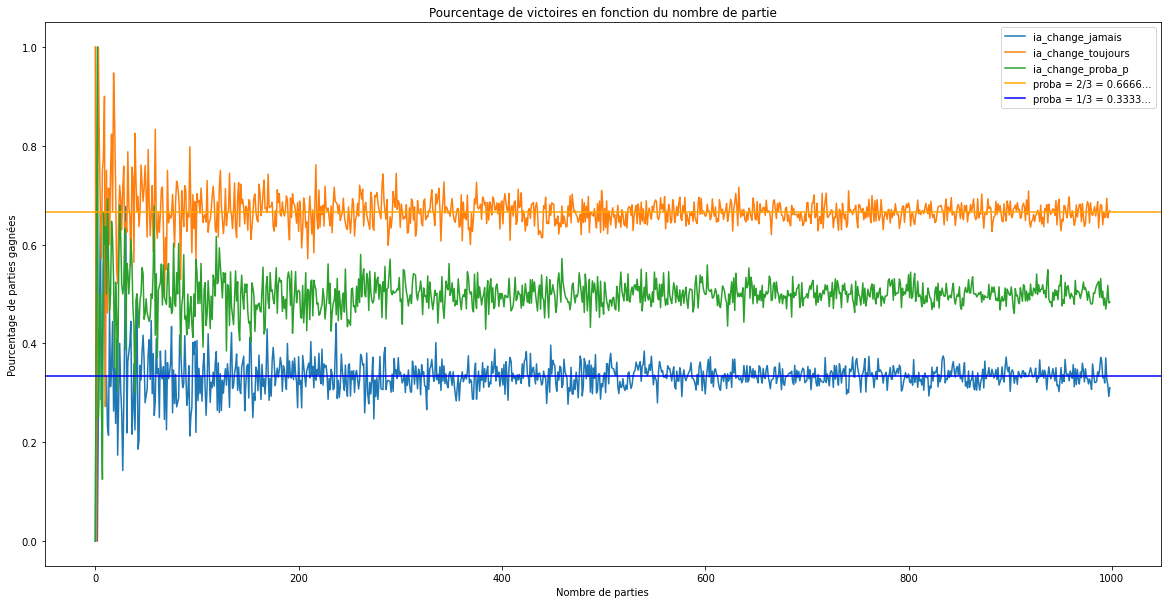

In [152]:
import pandas as pd

stats_ia = {}


for ia in ["ia_change_jamais", "ia_change_toujours", "ia_change_proba_p"]:
    stats_ia[ia] = []
    for N_PARTIES in range(1, 1000):
        jeu_monthy = JeuMonthy(user=ia, verbose=False, p=0.5)
        jeu_monthy.jouer_plusieurs_jeux(N_PARTIES)
        score = jeu_monthy.score
        score_in_percent = score / N_PARTIES
        stats_ia[ia].append(score_in_percent)



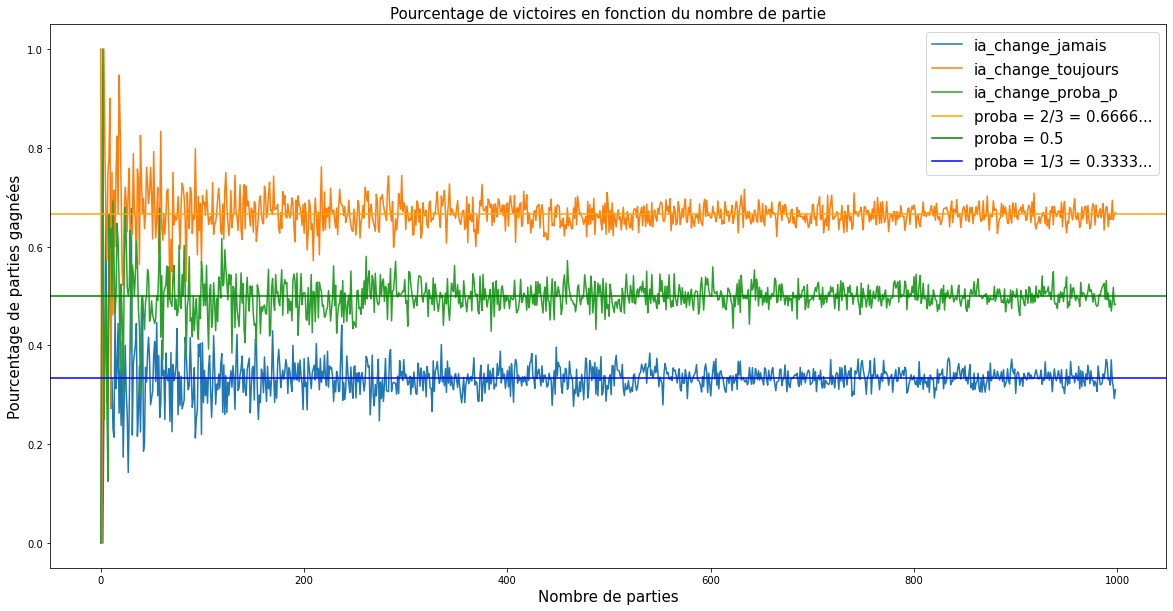

In [157]:
df = pd.DataFrame.from_dict(stats_ia, orient='index').T
df = df.rename(index={ia_1:"IA qui ne change jamais", ia_2: "IA qui change toujours", ia_3:"ia_change_proba_p"})
df.plot(figsize=(20,10))
plt.axhline(2/3, color='orange', label="proba = 2/3 = 0.6666...")
plt.axhline(0.5, color='green', label="proba = 0.5")
plt.axhline(1/3, color='blue', label="proba = 1/3 = 0.3333...")
plt.legend(fontsize=15)
plt.title("Pourcentage de victoires en fonction du nombre de partie", fontsize=15)
plt.xlabel("Nombre de parties", fontsize=15)
plt.ylabel("Pourcentage de parties gagnées", fontsize=15)
plt.show()